<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/PatternRecognition/blob/main/PR01_01_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimeinto de Patrones
## Dr. Carlos Vilaseñor
## Biblioteca Pandas

La biblioteca *pandas* es una extensión de *NumPy* y *Matplotlib* útil para la manipulación y análisis de datos en *Python*.

In [1]:
import pandas as pd
import numpy as np

## Objetos principales

Existen dos objetos principales en la biblioteca de *pandas*, el objeto **Series** y el objeto **DataFrame**

### Objeto Series

El objeto Series un arreglo de *NumPy* ndarray unidimensional con etiquetas en el eje, por ejemplo:


In [2]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])
print(s)
print('acceso a elemento: ', s['a'])

a    3
b   -5
c    7
d    4
dtype: int64
acceso a elemento:  3


### Objeto DataFrame

El objeto DataFrame es el principal objeto de la biblioteca es un arreglo bidimensional de datos mezclados con encabezado (muy similar a los DataFrame del lenguaje de programación *R*), acontinuación un ejemplo:

In [3]:
data = { 'Nombre':['Carlos', 'Julia','Fabiola', 'Ernesto'],
           'edad':[28,25,56,21],
        'calificación':[100,89,48,75]}
# Es muy común llamar df a nuestro DataFrame
df = pd.DataFrame(data)
print(df)

    Nombre  edad  calificación
0   Carlos    28           100
1    Julia    25            89
2  Fabiola    56            48
3  Ernesto    21            75


Para ingresar a cada dato de nuestro DataFrame, lo podemos hacer de las siguientes maneras como si fuera una matriz

In [4]:
print(df.iat[0,0])
print(df.iat[1,2])
print(df.at[2,'Nombre'])

Carlos
89
Fabiola


Podemos escribir en el DataFrame con la misma indexación

In [5]:
s['b'] = 5
print('s = \n', s)
df.at[0,'Nombre'] = 'Charlie'
print('df = \n', df)

s = 
 a    3
b    5
c    7
d    4
dtype: int64
df = 
     Nombre  edad  calificación
0  Charlie    28           100
1    Julia    25            89
2  Fabiola    56            48
3  Ernesto    21            75


Tambien podemos eliminar filas de las Series y DataFrames

In [6]:
s.drop(['a'])
print(s)
df.drop('calificación', axis=1)
print(df)
df = df[df.Nombre != 'Charlie']
print(df)

a    3
b    5
c    7
d    4
dtype: int64
    Nombre  edad  calificación
0  Charlie    28           100
1    Julia    25            89
2  Fabiola    56            48
3  Ernesto    21            75
    Nombre  edad  calificación
1    Julia    25            89
2  Fabiola    56            48
3  Ernesto    21            75


## Exploración de datos

Trabajemos con un DataFrame mayor, para esto podemos leer desde un archivo *CSV*

In [7]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/countries.csv'
df = pd.read_csv('countries.csv')

--2023-09-07 17:52:36--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/countries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81887 (80K) [text/plain]
Saving to: ‘countries.csv’

countries.csv       100%[===================>]  79.97K  --.-KB/s    in 0.02s   

2023-09-07 17:52:36 (5.04 MB/s) - ‘countries.csv’ saved [81887/81887]



Cuando se sabe poco de los datos que estamos leyendo es buena costumbre hacer una exploración de los datos por ejemplo con las siguientes funciones

In [8]:
# Se imprimen los primeros cinco regristros
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [9]:
# Se imprimen los últimos cinco registros
df.tail()

,country,year,pop,continent,lifeExp,gdpPercap
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143.0,Africa,43.487,469.709298


In [10]:
# Tamaño del DataFrame
print(df.shape)

(1704, 6)


In [11]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [12]:
# Mostrar columnas
df.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

In [13]:
# Datos estadísticos de las variables númericas
df.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [14]:
# Crear una matrix de datos
df.values

array([['Afghanistan', 1952, 8425333.0, 'Asia', 28.801, 779.4453145],
       ['Afghanistan', 1957, 9240934.0, 'Asia', 30.332, 820.8530296],
       ['Afghanistan', 1962, 10267083.0, 'Asia', 31.997, 853.10071],
       ...,
       ['Zimbabwe', 1997, 11404948.0, 'Africa', 46.809, 792.4499603],
       ['Zimbabwe', 2002, 11926563.0, 'Africa', 39.989, 672.0386227],
       ['Zimbabwe', 2007, 12311143.0, 'Africa', 43.487, 469.7092981]],
      dtype=object)

In [15]:
# Media de variables númericas
print(df.mean())
print(df.max())

year         1.979500e+03
pop          2.960121e+07
lifeExp      5.947444e+01
gdpPercap    7.215327e+03
dtype: float64
country          Zimbabwe
year                 2007
pop          1318683096.0
continent         Oceania
lifeExp            82.603
gdpPercap     113523.1329
dtype: object


<ipython-input-15-616c7afcaaab>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())


In [16]:
# Renombrar columnas
df = df.rename(columns={'gdpPercap':'gdp'})
df.head()

,country,year,pop,continent,lifeExp,gdp
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


## Selección, reemplazo, filtrado, ordenación

A continuación se muestran varios metodos de selección de sub DataFrames

In [18]:
# Regresar una columna como Series
s1 = df['country']
s2 = df.country
print(s1)
print(s2)

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object
0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object


In [20]:
# Regresar una columna como un DataFrame
df2 = df[['country']]
df2

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [21]:
# Cambiar todos los elementos con cierto valor
df2 = df.replace(1952,'one')
df2.head()

,country,year,pop,continent,lifeExp,gdp
0,Afghanistan,one,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [22]:
# Filtrado por columna
df[df.country == 'Mexico']

,country,year,pop,continent,lifeExp,gdp
984,Mexico,1952,30144317.0,Americas,50.789,3478.125529
985,Mexico,1957,35015548.0,Americas,55.190,4131.546641
986,Mexico,1962,41121485.0,Americas,58.299,4581.609385
987,Mexico,1967,47995559.0,Americas,60.110,5754.733883
988,Mexico,1972,55984294.0,Americas,62.361,6809.406690
989,Mexico,1977,63759976.0,Americas,65.032,7674.929108
990,Mexico,1982,71640904.0,Americas,67.405,9611.147541
991,Mexico,1987,80122492.0,Americas,69.498,8688.156003
992,Mexico,1992,88111030.0,Americas,71.455,9472.384295
993,Mexico,1997,95895146.0,Americas,73.670,9767.297530


In [23]:
# Filtrado por multiples columnas
df[(df.country == 'Mexico')&(df.year >= 1977)&(df.lifeExp < 70)]

,country,year,pop,continent,lifeExp,gdp
989,Mexico,1977,63759976.0,Americas,65.032,7674.929108
990,Mexico,1982,71640904.0,Americas,67.405,9611.147541
991,Mexico,1987,80122492.0,Americas,69.498,8688.156003


La siguiente notación nos da un warning ya que puede ser ambigua

In [25]:
#Filtrado con reindexado automático
df_mex = df[df.country == 'Mexico'][df.year >= 1977][df.lifeExp < 70]
df_mex

<ipython-input-25-e2d20d1c4b84>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mex = df[df.country == 'Mexico'][df.year >= 1977][df.lifeExp < 70]


,country,year,pop,continent,lifeExp,gdp
989,Mexico,1977,63759976.0,Americas,65.032,7674.929108
990,Mexico,1982,71640904.0,Americas,67.405,9611.147541
991,Mexico,1987,80122492.0,Americas,69.498,8688.156003


In [26]:
# Reindexar datos
df_mex = df_mex.reset_index()
df_mex = df_mex.drop('index', axis=1)
print(df_mex)

  country  year         pop continent  lifeExp          gdp
0  Mexico  1977  63759976.0  Americas   65.032  7674.929108
1  Mexico  1982  71640904.0  Americas   67.405  9611.147541
2  Mexico  1987  80122492.0  Americas   69.498  8688.156003


In [27]:
# Ordenar datos por una columna
df_mex.sort_values('gdp')

,country,year,pop,continent,lifeExp,gdp
0,Mexico,1977,63759976.0,Americas,65.032,7674.929108
2,Mexico,1987,80122492.0,Americas,69.498,8688.156003
1,Mexico,1982,71640904.0,Americas,67.405,9611.147541


## Dibujar

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'pop'}>],
       [<Axes: title={'center': 'lifeExp'}>,
        <Axes: title={'center': 'gdp'}>]], dtype=object)

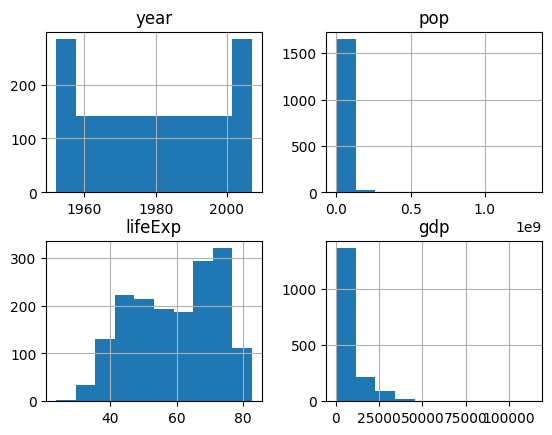

In [28]:
# Histograma de todas las variables númericas
df.hist()

<Axes: xlabel='year'>

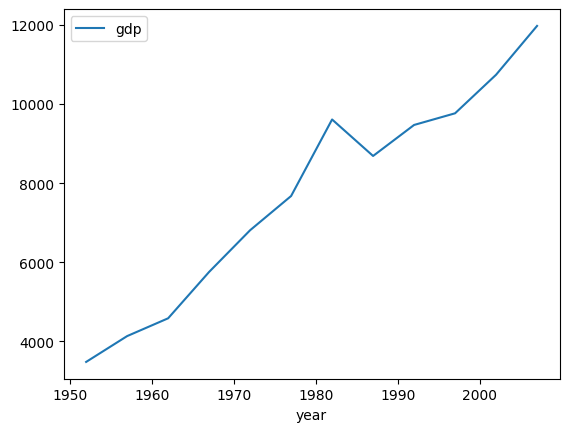

In [29]:
# Dibujar solamente con el nombre de las columnas
df[df.country == 'Mexico'].plot(x='year',y='gdp')

En la exploración de datos es de suma importancia las graficas de disperción (scatter graphics), pandas nos permite dibujar todas las posibles graficas de dispersión e histogramas al mismo tiempo con el comando siguiente (está función es de suma importancia en la exploración de los datos):

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='pop', ylabel='year'>,
        <Axes: xlabel='lifeExp', ylabel='year'>,
        <Axes: xlabel='gdp', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='pop'>,
        <Axes: xlabel='pop', ylabel='pop'>,
        <Axes: xlabel='lifeExp', ylabel='pop'>,
        <Axes: xlabel='gdp', ylabel='pop'>],
       [<Axes: xlabel='year', ylabel='lifeExp'>,
        <Axes: xlabel='pop', ylabel='lifeExp'>,
        <Axes: xlabel='lifeExp', ylabel='lifeExp'>,
        <Axes: xlabel='gdp', ylabel='lifeExp'>],
       [<Axes: xlabel='year', ylabel='gdp'>,
        <Axes: xlabel='pop', ylabel='gdp'>,
        <Axes: xlabel='lifeExp', ylabel='gdp'>,
        <Axes: xlabel='gdp', ylabel='gdp'>]], dtype=object)

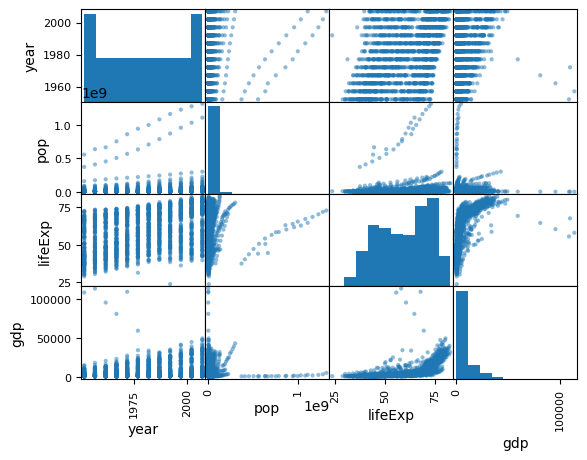

In [30]:
# Matriz de dispersión
pd.plotting.scatter_matrix(df)

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='pop', ylabel='year'>,
        <Axes: xlabel='lifeExp', ylabel='year'>,
        <Axes: xlabel='gdp', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='pop'>,
        <Axes: xlabel='pop', ylabel='pop'>,
        <Axes: xlabel='lifeExp', ylabel='pop'>,
        <Axes: xlabel='gdp', ylabel='pop'>],
       [<Axes: xlabel='year', ylabel='lifeExp'>,
        <Axes: xlabel='pop', ylabel='lifeExp'>,
        <Axes: xlabel='lifeExp', ylabel='lifeExp'>,
        <Axes: xlabel='gdp', ylabel='lifeExp'>],
       [<Axes: xlabel='year', ylabel='gdp'>,
        <Axes: xlabel='pop', ylabel='gdp'>,
        <Axes: xlabel='lifeExp', ylabel='gdp'>,
        <Axes: xlabel='gdp', ylabel='gdp'>]], dtype=object)

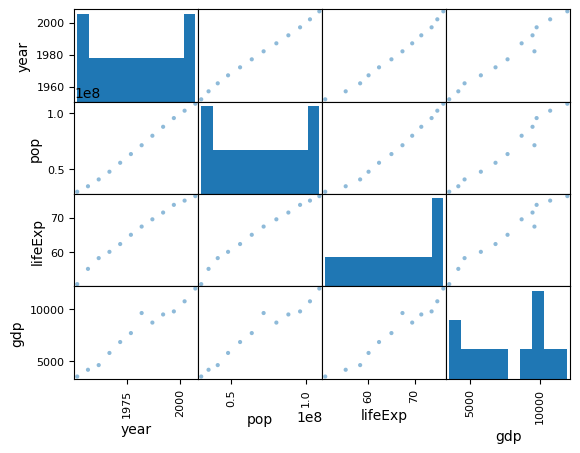

In [31]:
# Grafica de México
pd.plotting.scatter_matrix(df[df.country == 'Mexico'])

## Responder preguntas específicas

In [32]:
# ¿Cuantos y cuales países tienen una esperanza de vida mayor o igual a 80 en el 2002?
paises = list(df[df.year == 2002][df.lifeExp >= 80].country)
print('Número de paises: ', len(paises))
print('Paises: ', paises)

Número de paises:  7
Paises:  ['Australia', 'Hong Kong China', 'Iceland', 'Italy', 'Japan', 'Sweden', 'Switzerland']


<ipython-input-32-d8f69725394d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paises = list(df[df.year == 2002][df.lifeExp >= 80].country)


In [33]:
# ¿Pais con el mayor Producto Interno Bruto?
df[df.gdp == max(df.gdp)].country.iat[0]
#print('El pais con mayor PIB es: ', len(paises))

'Kuwait'

In [34]:
# ¿En qué año México sobrepaso los 70 millones de habitantes?
year = df[df.country == 'Mexico'][df['pop'] > 70000000].sort_values('pop').year.iat[0]
print('En el año de: ',year)

En el año de:  1982


<ipython-input-34-d7d6f643b13b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year = df[df.country == 'Mexico'][df['pop'] > 70000000].sort_values('pop').year.iat[0]
